<div style="text-align:center">

<h2>Logistic Regression from Scratch</h2>
<h4>Aditya Rijal (078bct008)</h4>

<hr style="width:80%; margin:auto">

</div>


### Imports


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading and Preprocessing


In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # target

In [3]:
# Train Test Split
def train_test_split(X, y, random_state=42, test_size=0.2):

    n_samples = X.shape[0]  # Number of samples
    np.random.seed(random_state)  # Set seed
    shuffled_indices = np.random.permutation(np.arange(n_samples))  # Shuffle indices
    test_size = int(n_samples * test_size)  # test size

    # Split indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split features and target into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# Standardize Data
def standardize_data(X_train, X_test):

    # Calculate mean and std deviation using training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Standardize
    X_train = (X_train - mean) / (std + 1e-8)
    X_test = (X_test - mean) / (std + 1e-8)

    return X_train, X_test

In [6]:
X_train, X_test = standardize_data(X_train, X_test)

### Model Implementation


In [7]:
class LogisticRegression:

    def __init__(self, lr=0.01):
        np.random.seed(1)
        self.lr = lr
        self.theta = None
        self.bias = None
        
    def initialize_parameter(self):
        self.theta = np.zeros(self.X.shape[1])
        self.bias = 0.0
        
    def sigma(self, z):
        # Sigmoid function
        z = np.clip(z, -500, 500) # for stability
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        # Computes forward propagation
        return self.sigma(X @ self.theta + self.bias)

    def compute_cost(self, predictions):
        # Computes cross entropy cost function for given prediction
        return -np.mean(
            self.y * np.log(predictions + 1e-8)
            + (1 - self.y) * np.log(1 - predictions + 1e-8)
        )  # added small value epsilon to avoid log of 0
    
    def compute_gradient(self, predictions):
        # Computes gradients for model using given predictions
        m = self.X.shape[0] # number of training samples
        self.dtheta = (self.X.T @ (predictions - self.y)) / m # Gradient w.r.t weights
        self.dbias = np.mean(predictions - self.y)
        
    def fit(self, X, y, iterations, plot_cost = True):
        # Trains model on given input X and labels y for specified iterations
        self.X = X
        self.y = y
        
        self.initialize_parameter()
        
        costs = []
        for i in range(iterations):
            
            predictions = self.forward(self.X)  # forward propagation
            cost = self.compute_cost(predictions)  # compute cost 
            costs.append(cost)
            self.compute_gradient(predictions)  # compute gradients
            # Update parameters
            self.theta -= self.lr * self.dtheta
            self.bias -= self.lr * self.dbias
            # print cost every 1000 iterations
            if i % 1000 == 0:
                print(f"Cost after iteration {i} : {cost:.6f}")
        # Cost vs Iteration plot    
        if plot_cost:
            plt.figure(figsize=(8, 5))
            plt.plot(costs)
            plt.title("Cost vs Iteration", color = "#41BEE9")
            plt.xlabel("Iterations", color = "#41BEE9")
            plt.ylabel("Cost", color = "#41BEE9")
            plt.grid(True, linestyle= "--", alpha = 0.6)
            plt.tight_layout()
            plt.show()
    
    def predict(self, X, threshold = 0.5):
        # Predicts the label for given input X
        predictions = self.forward(X)
        return (predictions >= threshold).astype(int)

Cost after iteration 0 : 0.693147
Cost after iteration 1000 : 0.107019
Cost after iteration 2000 : 0.087668
Cost after iteration 3000 : 0.079149
Cost after iteration 4000 : 0.074036
Cost after iteration 5000 : 0.070498
Cost after iteration 6000 : 0.067844
Cost after iteration 7000 : 0.065746
Cost after iteration 8000 : 0.064027
Cost after iteration 9000 : 0.062581


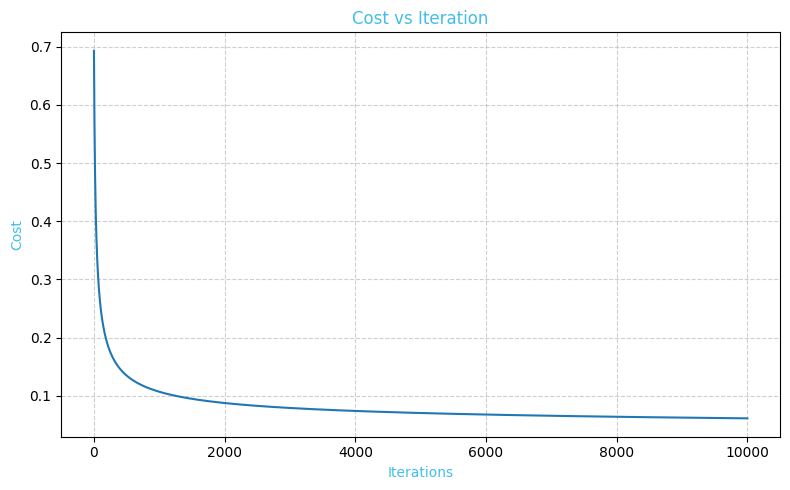

In [8]:
lg = LogisticRegression()
lg.fit(X_train, y_train, 10000)

### Evaluation

In [9]:
class ClassificationMetrics:
    
    def __init__(self, y_true, y_pred):
        self.y_true = np.asarray(y_true).flatten()
        self.y_pred = np.asarray(y_pred).flatten()
        self.total_samples = len(self.y_true)
        self.correct_predictions = np.sum(self.y_true == self.y_pred)
        self.true_positives = np.sum((self.y_true == 1) & (self.y_pred == 1))
        self.false_positives = np.sum((self.y_true == 0) & (self.y_pred == 1))
        self.false_negatives = np.sum((self.y_true == 1) & (self.y_pred == 0))
    
    def accuracy(self):
        return self.correct_predictions / self.total_samples
    
    def precision(self):
        return self.true_positives / (self.true_positives + self.false_positives)
    
    def recall(self):
        return self.true_positives / (self.true_positives + self.false_negatives)
    
    def f1_score(self):
        p = self.precision()
        r = self.recall()
        return 2 * p * r / (p + r)


In [10]:
y_pred = lg.predict(X_test)
cm = ClassificationMetrics(y_test, y_pred)
print(f"Accuracy: {cm.accuracy():.2%}")
print(f"Precision: {cm.precision():.2%}")
print(f"Recall: {cm.recall():.2%}")
print(f"F1-Score: {cm.f1_score():.2%}")


Accuracy: 98.23%
Precision: 98.59%
Recall: 98.59%
F1-Score: 98.59%
